# Evolving Population

In this notebook we focus on reproducing the evolution of population fitness distribution. Our end goal is to visualize fitness distributions of multiple steps of TS-DE. With this plot, we show how TS-DE iteratively shifts the fitness distribution towards the maximum value.

In [1]:
import sys
import math
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sys.path.append('../')

from util.common import zero_population, linear_bayesian_utility_model
from util.TS_DE.TS_DE import TS_DE


**Reproducing right-hand side Figure 6.2.:**

**Parameter setup:**
- *d=40*
- *M=20*
- *T=60*
- *mu=0.1*
- *sigma=1*
- *lambda_=1*

**Claims we are testing:**
(i) In TS-DE the population's fitness distribution shifts towards optimal during evolution.

In [8]:
np.random.seed(seed=0)

# Initial setting for TS-DE and DE
d = 40
M = 20
T = 60
mu = 0.1

# Theta star - optimal theta - parametrization of the linear Bayesian utility model for
# which we aim to optimize the protein design.
theta_star = np.random.multivariate_normal(np.zeros(d), np.eye(d))

# Sequence that maximizes the utility function (used for visualizations).
x_star = [0 if theta_i < 0 else 1 for theta_i in theta_star]
max_fitness = linear_bayesian_utility_model(x=x_star, theta=theta_star)

In [3]:
# Execute TS-DE
populations, thetas = TS_DE(d=d,
                            T=T,
                            M=M,
                            theta_star=theta_star,
                            S_0=zero_population(d=d, M=M),
                            mu=mu,
                            sigma=1,
                            lambda_=1,
                            f=linear_bayesian_utility_model)

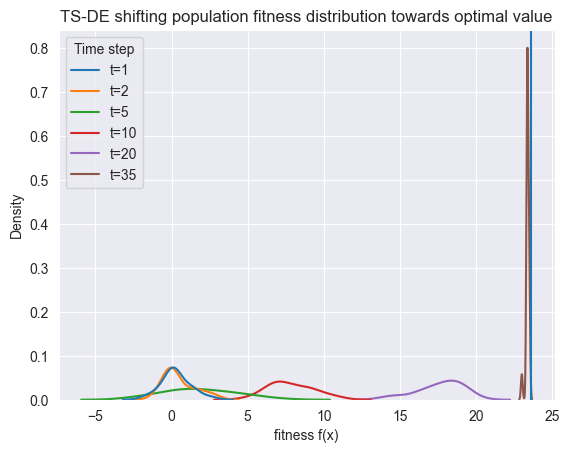

In [12]:
data = []
for i in [1, 2, 5, 10, 20, 35]:
    S = populations[i]
    data.extend(
        [
            {'Time step': f't={i}', 'fitness f(x)': linear_bayesian_utility_model(x=x, theta=theta_star)} for x in S
        ]
    )

sns.kdeplot(data=pd.DataFrame(data), x='fitness f(x)', hue='Time step')
plt.axvline(x=max_fitness, label='max fitness')
plt.title('TS-DE shifting population fitness distribution towards optimal value')
plt.savefig('../plots/evolving_population_fitness.png')
plt.show()